# **Bayesian Inference**
---
---

## **Bayesian Inference**: Update Probability as New Data is Gathered
### *Posterior Distribution* = (*Prior Distribution* x *Likelihood Function*) / (*Evidence*)
- **Prior Probability Distribution:** probability of an event before we see the data
- **Likelihood Function:** probability of observing a dataset when given certain values for the parameters `Θ`
- **Evidence:** how likely the observed data is 
- **Posterior Distribution:** reflects the probability distribution by taking both data and prior assumptions into account
    - combine two different distributions (likelihood and prior) into one 'smarter' distribution (posterior)

### Import Libraries

In [1]:
import numpy as np 
np.set_printoptions(threshold=100)

import pandas as pd
import scipy.stats as stats 

from matplotlib import pyplot as plt


---
---
# Bayesian Inference to Make Predictions About Future Engagement
---
---
- Medium Article: [Bayesian Inference](https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6)
    - Roughly 2000 Views Per Post, Typically a 30% Success Rate with User Engagement

### Generate Dataset and Parameters (theta = Θ)

In [2]:
# Success Rate of 30%
success_prob = 0.3

# IID (Independent and Identically Distributed) Assumption
# Interaction = 1, Scroll-By = 0
data = np.random.binomial(n=1,p=success_prob,size=2000)
data

array([0, 0, 0, ..., 0, 0, 0])

## Prior Distribution `(P(Θ))`
---
- Domain Ranged 0 to 1 in a continuous [**Beta Distribution**](https://www.sciencedirect.com/topics/mathematics/beta-distribution)
- [**Probability Density Function**](https://abaqus-docs.mit.edu/2017/English/SIMACAEMODRefMap/simamod-c-probdensityfunc.htm): probability the value of a *continuous random variable* falls within a range
    - [**Continuous Random Variable**](https://online.stat.psu.edu/stat414/lesson/14): takes on infinite number of possible outcomes 



In [3]:
# Positive Parameters 
Alpha = 400 #Success
Beta = 2000 - Alpha #Failures

# Probability of Success on a Given Trial
# Evenly Spaced Parameter Range from 0%-100%
theta_range = np.linspace(0,1,1000)

# Beta Distribution: probability distribution on probabilities 
    # Probability Density Function (PDF): probaility a continuous random variable falls within a range
prior = stats.beta.pdf(x=theta_range, a=Alpha, b=Beta)

print('Theta Range: {}\nPrior Distribution: {}'.format(theta_range,prior))

Theta Range: [0.       0.001001 0.002002 ... 0.997998 0.998999 1.      ]
Prior Distribution: [0. 0. 0. ... 0. 0. 0.]


### Plot Prior Distribution 

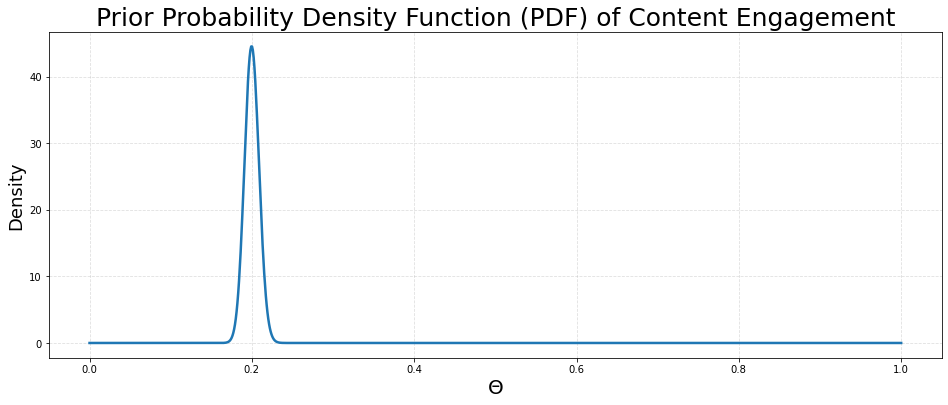

In [4]:
plt.figure(figsize=(16,6))

plt.plot(theta_range, prior, linewidth=2.5)

plt.title('Prior Probability Density Function (PDF) of Content Engagement', fontsize=25)
plt.xlabel('Θ', fontsize=20)
plt.ylabel('Density', fontsize=18)

plt.grid(alpha=0.4, linestyle='--')
plt.show()

## Likelihood Function `(P(X|Θ))` for all possible `Θ`
---
- Binomial Distribution: probability of seeing the data `X` in a parameter `Θ`
    - aka *'sampling distribution'*
- [Probability Mass Function (PMF)](https://abaqus-docs.mit.edu/2017/English/SIMACAEMODRefMap/simamod-c-probdensityfunc.htm): probabilities of outcomes
    - random variable must have a specific value (1 or 0 in this case)

In [5]:
# Binomial Distribution: probability of 'k' successes in 'n' periods
# Probability Mass Function (PMF): probability that 'X' = 'k' successes 
    # k = number of success
    # n = number of trials 
    # p = probability of success 
likelihood = stats.binom.pmf(k=np.sum(data), n=len(data), p=theta_range)

print('Likelihood: {}'.format(likelihood))

Likelihood: [0. 0. 0. ... 0. 0. 0.]


### Plot Likelihood Probability of Engagement

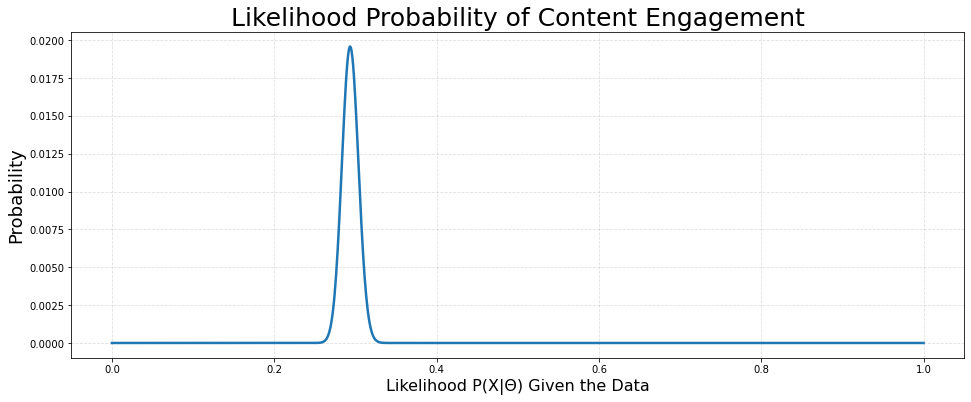

In [6]:
plt.figure(figsize=(16,6))

plt.plot(theta_range, likelihood, linewidth=2.5)

plt.title('Likelihood Probability of Content Engagement', fontsize=25)
plt.xlabel('Likelihood P(X|Θ) Given the Data', fontsize=16)
plt.ylabel('Probability', fontsize=18)

plt.grid(alpha=0.4, linestyle='--')
plt.show()

## Posterior Distribution `P(Θ|X)`
---
### updating `P(Θ)` into a more informative `P(Θ|X)` as more data becomes avaliable
- computing the *Posterior Distribution* for every **Θ**
- end goal to find the *Maximum a Posteriori (MAP)*
    - aka the *mode* of the *Posterior Distribution* or the `Θ` that gives the highest posterior
- more data you gather, the more the posterior will shift to the likelihood and less of the prior
    - more new data = original prior matters less 
    - incorporating more information via sampling 


In [7]:
posterior = likelihood * prior
normalized_posterior = posterior / np.sum(posterior)

pos_max = posterior.max()
t_map = pd.Series(posterior, index=theta_range).idxmax()

print('Posterior: {}\nNormalized Posterior: {}\n\nMAP: {}\nΘ of MAP: {}'.format(posterior, normalized_posterior, pos_max, t_map))

Posterior: [0. 0. 0. ... 0. 0. 0.]
Normalized Posterior: [0. 0. 0. ... 0. 0. 0.]

MAP: 4.1076322704017353e-11
Θ of MAP: 0.24624624624624625


### Plot Posterior 

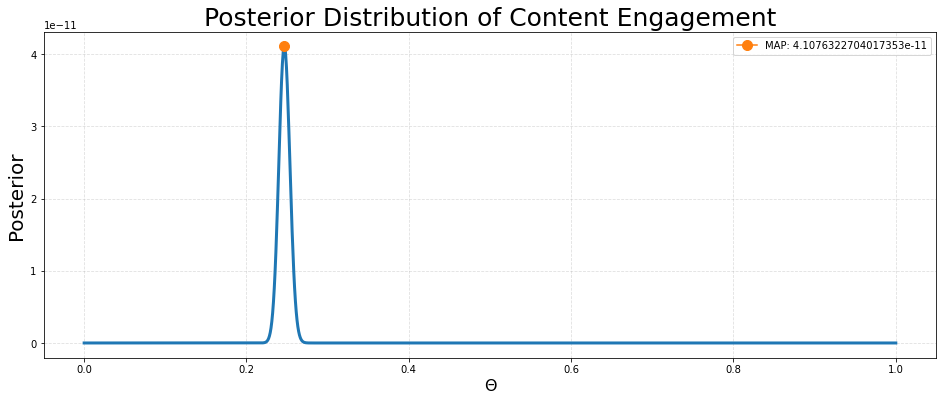

In [8]:
plt.figure(figsize=(16,6))

plt.plot(theta_range, posterior, linewidth=3)
plt.plot(t_map, pos_max, marker='o', markersize=10, label='MAP: {}'.format(pos_max))

plt.title('Posterior Distribution of Content Engagement', fontsize=25)
plt.xlabel('Θ', fontsize=16)
plt.ylabel('Posterior', fontsize=20)

plt.grid(alpha=0.4, linestyle='--')
plt.legend()
plt.show()

## Plot all Three Together
---
- calculate prior by subtracting two `stats.beta.cdf` to return a probability (`stats.beta.pdf` returns Density)
- `stats.binom.pmf` is a probability, so using subtracted CDF the units will match
- Optimization result does not change 


In [9]:
theta_range_cdf = theta_range + 0.0001
cdf_prior = stats.beta.cdf(x=theta_range_cdf, a=Alpha, b=Beta) - stats.beta.cdf(x=theta_range, a=Alpha, b=Beta)

print('Cumulative Distribution Function (CDF) for Prior Distribution: {}'.format(cdf_prior))

Cumulative Distribution Function (CDF) for Prior Distribution: [0. 0. 0. ... 0. 0. 0.]


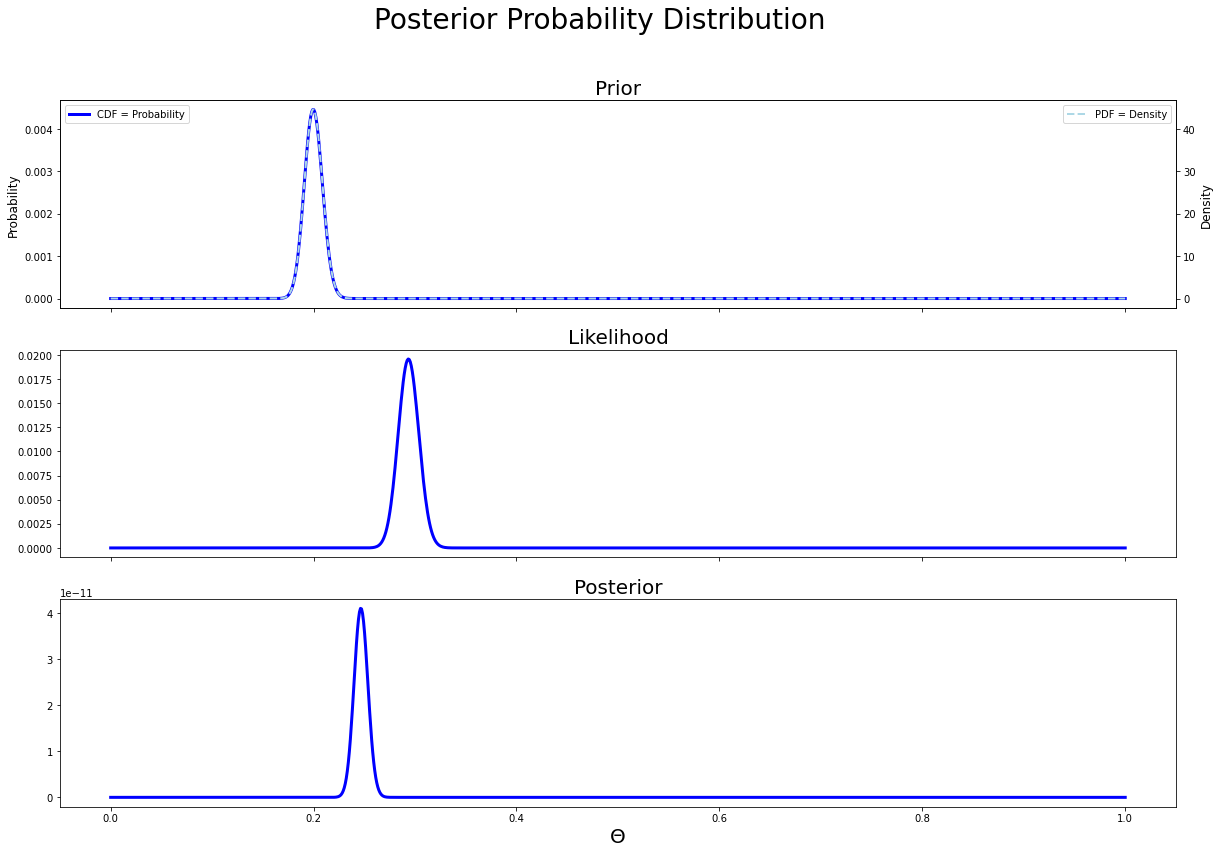

In [10]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(20,13))
plt.xlabel('Θ', fontsize=20)
plt.suptitle("Posterior Probability Distribution", fontsize=28)

axes[0].plot(theta_range, cdf_prior, label='CDF = Probability', linewidth=3, color='blue')
axes[0].set_ylabel("Probability", fontsize=12)
axes[0].set_title("Prior", fontsize=20)
axes[0].legend(loc=2)

ax02 = axes[0].twinx()
ax02.plot(theta_range, prior, label= 'PDF = Density', linewidth=2, linestyle='--', color='lightblue')
ax02.set_ylabel("Density", fontsize=12)
ax02.legend(loc=1)

axes[1].plot(theta_range, likelihood, label='Likelihood', linewidth=3, color='blue')
axes[1].set_title("Likelihood", fontsize=20)

axes[2].plot(theta_range, posterior, label="Posterior", linewidth=3, color='blue')
axes[2].set_title("Posterior", fontsize=20)

plt.show()